In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'C:\Users\wsaha\Documents\Hotel set'

In [3]:
#Import hotel data set with Latin -1 encoding

dfhotel = pd.read_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'), encoding='latin-1')

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
dfhotel.head()

,Unnamed: 0.1,Unnamed: 0,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,0,0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,1,1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,2,2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,3,3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,4,4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


In [6]:
dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66536 entries, 0 to 66535
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               66536 non-null  int64  
 1   Unnamed: 0                 66536 non-null  int64  
 2   Booking ID                 66536 non-null  object 
 3   Date of Booking            66536 non-null  object 
 4   Time                       66536 non-null  object 
 5   Customer ID                66536 non-null  object 
 6   Gender                     66536 non-null  object 
 7   Age                        66536 non-null  int64  
 8   Origin Country             66536 non-null  object 
 9   State                      66536 non-null  object 
 10  Destination Country        66536 non-null  object 
 11  Destination City           66536 non-null  object 
 12  No. Of People              66536 non-null  int64  
 13  No of Days                 66536 non-null  int

In [9]:
#creating a subset for k mean

numerical_columns = dfhotel.select_dtypes(include=['int64', 'float64']).columns
numerical_subset = dfhotel[numerical_columns]



In [10]:
numerical_subset.head()

,Unnamed: 0.1,Unnamed: 0,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price
0,0,0,42,1,8,1,4.3,243,0.25,243.000000,1944.0
1,1,1,44,3,1,2,4.2,312,0.24,156.000000,156.0
2,2,2,31,3,7,2,4.5,338,0.20,169.000000,1183.0
3,3,3,28,3,4,2,4.2,254,0.13,127.000000,508.0
4,4,4,44,5,3,3,4.6,313,0.17,104.333333,313.0


In [11]:
numerical_subset = numerical_subset.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [12]:
numerical_subset.head()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price
0,42,1,8,1,4.3,243,0.25,243.000000,1944.0
1,44,3,1,2,4.2,312,0.24,156.000000,156.0
2,31,3,7,2,4.5,338,0.20,169.000000,1183.0
3,28,3,4,2,4.2,254,0.13,127.000000,508.0
4,44,5,3,3,4.6,313,0.17,104.333333,313.0


In [13]:
numerical_subset.describe()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.436110,3.995807,3.233753,2.283380,4.288508,214.053730,0.188816,120.016938,382.728085
std,11.556725,2.000135,3.377925,1.031159,0.275518,108.126539,0.052766,92.845079,593.411295
min,19.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.100000,8.750000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.140000,53.666667,94.000000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.200000,92.666667,199.500000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.230000,156.000000,440.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.300000,575.000000,22824.000000


In [17]:
# Create a StandardScaler instance to standardize data
scaler = StandardScaler()

# Fit and transform the numerical_subset
numerical_scaled = scaler.fit_transform(numerical_subset)

# Convert the scaled array back to a DataFrame
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_subset.columns)



In [18]:
##standardized table

numerical_scaled_df

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price
0,0.308385,-1.497814,1.411009,-1.244610,0.041709,0.267709,1.159541,1.324615,2.631031
1,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,0.905855,0.970025,0.387563,-0.382079
2,-0.643449,-0.497874,1.114967,-0.274820,0.767619,1.146316,0.211961,0.527582,1.348606
3,-0.903040,-0.497874,0.226841,-0.274820,-0.321246,0.369443,-1.114651,0.075213,0.211106
4,0.481445,0.502067,-0.069201,0.694971,1.130574,0.915104,-0.356587,-0.168924,-0.117505
...,...,...,...,...,...,...,...,...,...
66531,0.308385,0.002096,0.226841,-0.274820,0.041709,-0.296449,0.970025,-0.312533,-0.031560
66532,1.346749,0.002096,0.226841,-0.274820,-0.321246,-0.823613,0.022445,-0.619498,-0.223671
66533,1.606340,1.502007,-0.661285,1.664761,0.404664,0.961346,0.590993,-0.436396,-0.510995
66534,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,-0.379685,1.159541,-0.361001,-0.499199


# <span style="font-size:16px; color:black;">Elbow technique.</span>

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(numerical_scaled_df).score(numerical_scaled_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [22]:
score

[-598824.0000000002,
 -467874.61735118716,
 -401314.7460170486,
 -360415.0410843855,
 -328044.01744554896,
 -302989.5140268407,
 -283066.16832006816,
 -268599.4985292604,
 -253640.60384033003]

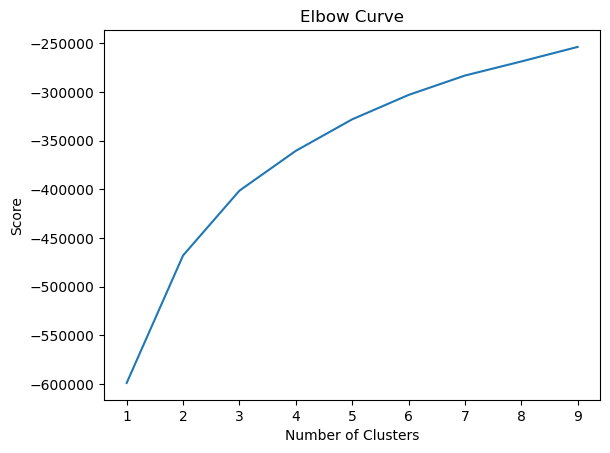

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [26]:
## Elbow has the slight jum at 3 before shapening (slight). So moving with 3 clusters for k mean.
## If this does not indicate clear structures later will try Some alternative approaches i.e silhouette analysis, gap statistics.

# <span style="font-size:16px; color:black;">K mean clustering.</span>

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [29]:
# Fit the k-means object to the data.

kmeans.fit(
numerical_scaled_df)

C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [31]:
numerical_scaled_df['clusters'] = kmeans.fit_predict(numerical_scaled_df)

C:\Users\wsaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
#scaled data frame with clusters

numerical_scaled_df.head()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price,clusters
0,0.308385,-1.497814,1.411009,-1.244610,0.041709,0.267709,1.159541,1.324615,2.631031,0
1,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,0.905855,0.970025,0.387563,-0.382079,2
2,-0.643449,-0.497874,1.114967,-0.274820,0.767619,1.146316,0.211961,0.527582,1.348606,0
3,-0.903040,-0.497874,0.226841,-0.274820,-0.321246,0.369443,-1.114651,0.075213,0.211106,0
4,0.481445,0.502067,-0.069201,0.694971,1.130574,0.915104,-0.356587,-0.168924,-0.117505,1


In [33]:
# cluster values

numerical_scaled_df['clusters'].value_counts()

clusters
1    28098
0    19723
2    18715
Name: count, dtype: int64

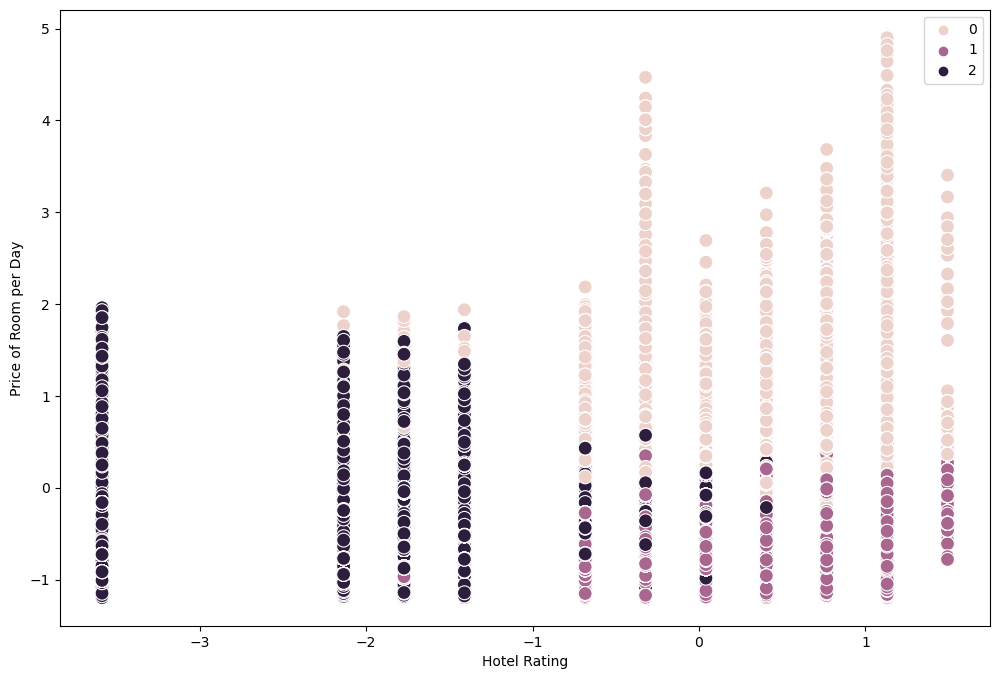

In [35]:
# Plot the clusters for the "rating" and "priper of room per day" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['Hotel Rating'], y=numerical_scaled_df['Price of Room per Day'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Hotel Rating') # Label x-axis.
plt.ylabel('Price of Room per Day') # Label y-axis.
plt.show()

# <span style="font-size:16px; color:black;">k mean clustering hotels with standerdize rating below -1 have not exceeded stadardized price of 2 which is an important observation.</span>

# <span style="font-size:16px; color:black;">When standardized rating is above -1 it shows a possibility of setting a higher price as almost all the cluster 0(light purple are positioned there).</span>

# <span style="font-size:16px; color:black;">however sluster 1 (Dark purple) also positioned there which means even with high rating there are hotels with lower price for a room per day. This need to check against the situated country for further analysis.</span>

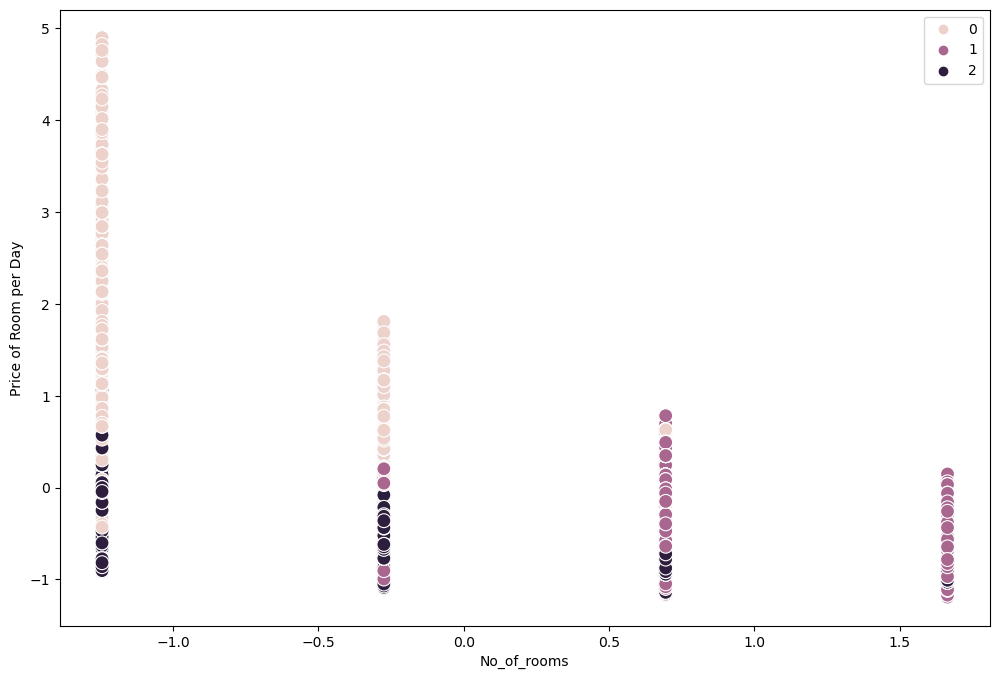

In [39]:
# Plot the clusters for the "no of rooms" and "Price of Room per Day" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['No_of_rooms'], y=numerical_scaled_df['Price of Room per Day'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('No_of_rooms') # Label x-axis.
plt.ylabel('Price of Room per Day') # Label y-axis.
plt.show()

# <span style="font-size:16px; color:black;">Here we could see that most of the time the dark purple cluster where when a person book more rooms price of room per day has been less .</span>

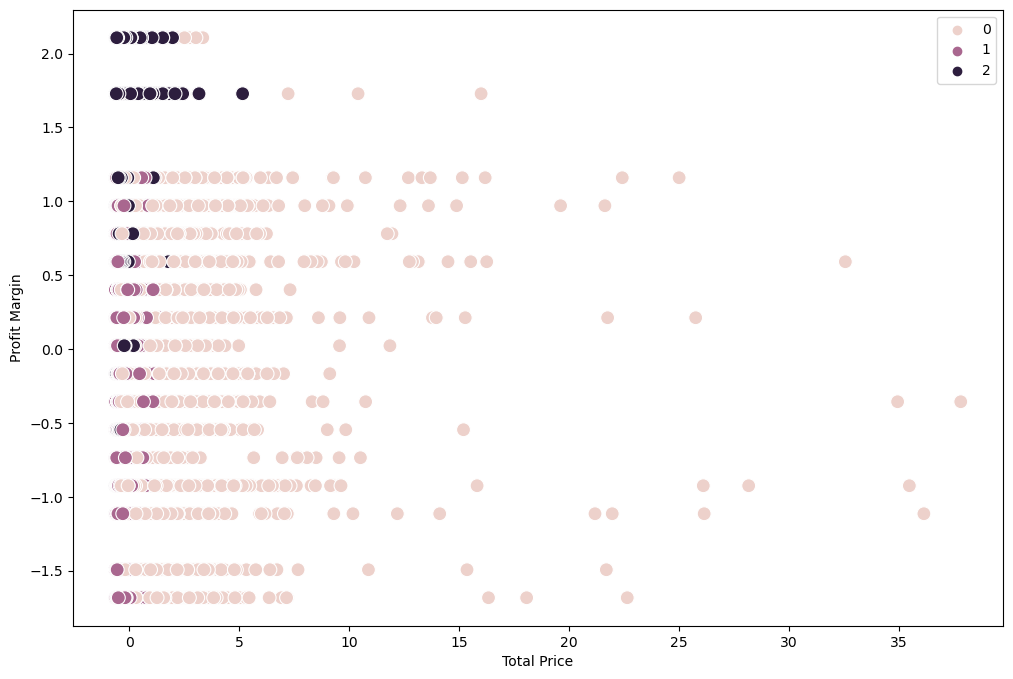

In [43]:
# Plot the clusters for the "Profit Margin" and "No. Total Price.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['Total Price'], y=numerical_scaled_df['Profit Margin'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Price') # Label x-axis.
plt.ylabel('Profit Margin') # Label y-axis.
plt.show()

# <span style="font-size:16px; color:black;">We could see one clear cluster: dark blue indicates that when total price is low tehere profit margin is high. So this is a vital observaition to further observe what factors made surethese hotels earned higher profits at lower price</span>

In [44]:
numerical_scaled_df.to_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_standardized.csv'))